# The lapidarist problem

*This problem is for you to:*

*Show your abilities in data loading, cleaning and descriptive analysis. Some rows contain errors. Extra points: clean these rows and include them in your analysis.*
*Show your modeling abilities. Bonus points for testing your model’s error using a test set.*


The limousine comes to a full stop. As the driver gets out to open the door you take a deep breath and get inside. Inside the meeting room you find the Prime Minister, accompanied by a fat, tall man and a short, deform one with long ears and an even longer nose.

Prime Minister: “Ah! You’re here! Great! Let me introduce my guests. This is Fidelious, Minister of Magic, and Krenk, the owner of the Gringotts Wizarding Bank.”

You: “Uhhh, ma’am, is this a joke?”

Fidelious: “Not at all, but don’t worry, don’t sweat the details, tomorrow you won’t remember anything. Security measures, you see.”

Krenk: “Let’s move things along. I don’t like to be exposed to Muggles.”

You: “What...” The Prime Minister interrupts you.

Prime Minister: “Our friends here seem to have run into a bit of an issue, see, some diamonds seem to have been stolen from the bank. Problem is, the only person... goblin, sorry, ...who saw the diamonds prior to the robbery is our distinguished guest, Krenk.”

Fidelious: “And while the Ministry completely believes Krenk as to the diamonds’ worth, we need another person to validate his claim. Safety policies, you see.”

Prime Minister: “So, since you’re the best data scientist in our country, I thought you could help. Mr. Krenk will provide you with the characteristics of the missing diamonds so you can give us an estimate of how much the stolen diamonds are worth.”

You: “But I’m not a lapidarist.”

Prime Minister: “Which is why we’re providing you with a huge dataset, containing characteristics and prices for tens of thousands of diamonds. Now, get working.“

“Huge? Tens of thousands?“ You think. “And I thought I was the clueless one here.”

Entendimiendo del problema:
El banco de magos de Gringotts ha sido robado, se llevaron diamantes y la persona quien los vio antes del robo fue el invitado Krenk lo cual es el propietario del banco. Se proporciona información que puede ser de interés, como lo es las caractarísticas miles de diamantes existentes en el banco. 
La misión otorgada por el primer ministro consta de estimar el valor de los diamantes robados.
Datos Existentes: 
Una base de datos que contiene miles de diamantes con diferentes características.
Una tabla de los diamantes que han sido robados.

Objetivo principal: 
    - Estimación del valor de los diamantes robados.

Proceso a llevar a cabo:

1.- Carga de los datos.

    - Se pretende hacer uso de la paquetería Pandas para la manipulación de las bases de datos.
2.- Preparación de los datos (limpieza, transformación, etc) .

3.- Exploración de los datos.

    -A través de la paquetería matplot de pyplot se pretende realizar la visualización de los datos para un mejor análisis.
    
4.- Ingeniería de los datos.

    -Se pretende generar variables a partir de las proporcionadas por la base de datos y seleccionar las más importantes para mejorar el rendimiento del modelo a entrenar.
    
5.- Construcción del modelo.

    -Separación de las bases de datos en un conjunto para entrenamiento (80%) y prueba(20%).
    -Entrenamiento del modelo.
    -Evaluación del modelo.
    
6.- Despliegue del modelo.

    -Evaluar el modelo con los datos de los diamantes robados.
    -Medir rendimiento del modelo.
    
7.- Presentación de los resultados.



Un artículo publicado en el sitio Worthy que habla acerca de como estimar el valor de un diamante, menciona sobre los factores primarios, en particular hace referencia a 4 características que hacen que un diamante sea mucho más valioso que otros, a estas 4 características las agrupa como *The Four C's* que incluye el quilaje(*carat*), el color (*color*), la claridad (*clarity*) y el corte (*cut*).

Carat(quilate) = Es la unidad para elegir el peso de un diamante, su equivalencia en miligramos es 200 mg por cada quilate. Existe un sistema estandarizado para medir los quilates, donde el más pesado es de 100 puntos.
    Tipo de dato: Numérico - flotante.
    
Color = Un diamante es mucho más valioso que otro cuando carece de color, por lo tanto, un diamante completamente incoloro es mucho más valioso que aquel que es ligeramente amarillo.
   Tipo de dato: Categórico.

Clarity = Un diamante es más valioso que otro si este cuenta con mayor claridad, que tenga mayor claridad hace referencia a que tenga menos imperfecciones tanto externas como internas. mientras menos defectos tenga un diamante este se vuelve mucho más valioso.

Cut = El brillo de un diamante incrementa o disminuye de acuerdo al corte del diamante. El corte se basa en tres efectos ópticos el brillo, la dispersión de la luz y el centelleo.

Estas 4 características juegan un papel importante al momento de darle valor a un diamante, mientras más rara sea la característica mucho más costoso es el diamante.




In [1]:
#Import packages to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read datasets
diamonds = pd.read_csv("dataset/diamonds.csv")
diamonds_stolen = pd.read_csv("dataset/diamonds_stolen.csv")
rowsD = diamonds.size
rowsStolen = diamonds_stolen.size

In [3]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
pd.value_counts(diamonds['cut'])#Count data for specific "cut" variable

Ideal          21537
Premium        13782
Very Good      12076
Good            4900
Fair            1610
P?remium           2
Ide&al             2
Go?od              2
*'Ideal            2
!Good              1
Ide*'al            1
Very G#ood         1
G#ood              1
Very *'Good        1
&Ideal             1
Pre!mium           1
Pr?emium           1
Very Go#od         1
Very Goo!d         1
Id!eal             1
#Very Good         1
&Premium           1
V&ery Good         1
I#deal             1
P*'remium          1
Ide!al             1
Name: cut, dtype: int64

In [5]:
pd.value_counts(diamonds['color'])#Count data for specific "color" variable

G      11284
E       9789
F       9536
H       8301
D       6773
I       5417
J       2805
*'E        3
#F         2
!E         2
&G         2
?J         2
&E         1
*'I        1
*'F        1
?E         1
?H         1
!F         1
&I         1
#D         1
#H         1
?G         1
&F         1
!H         1
!I         1
#G         1
Name: color, dtype: int64

In [6]:
pd.value_counts(diamonds['clarity'])#Count data for specific "clarity" variable

SI1       13058
VS2       12249
SI2        9189
VS1        8164
VVS2       5062
VVS1       3653
IF         1790
I1          741
VS?1          2
&VS2          2
S&I1          1
V&S2          1
S!I2          1
VV#S1         1
#SI!1         1
V!S2          1
VS#2          1
SI!1          1
V#S2          1
*'SI1         1
SI?1          1
!VS2          1
S*'I1         1
S?I1          1
S*'I2         1
&SI2          1
*'SI2         1
VVS*'2        1
#VS1          1
VV?S1         1
Name: clarity, dtype: int64

De la salidas anteriores, se puede notar que existen valores atípicos *outliers* que puedes afectar el desempeño del modelo, por lo tanto se procede a eliminarlos, ya que generan ambiguedad y no son grandes cantidades de datos.

In [7]:
reg = "[^A-Za-z0-9]"#El complemento de todo lo alfanumerico.
diamonds = diamonds[~diamonds['clarity'].str.contains(reg)]#Eliminamos datos que contienen valores no alfanumericos
diamonds = diamonds[~diamonds['cut'].str.contains(reg)] 
diamonds = diamonds[~diamonds['color'].str.contains(reg)]

In [8]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41796 entries, 0 to 53929
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  41796 non-null  int64  
 1   carat       41796 non-null  float64
 2   cut         41796 non-null  object 
 3   color       41796 non-null  object 
 4   clarity     41796 non-null  object 
 5   depth       39480 non-null  float64
 6   table       41796 non-null  float64
 7   price       41796 non-null  int64  
 8   x           40946 non-null  float64
 9   y           41327 non-null  float64
 10  z           41796 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.8+ MB


In [9]:
#Count null values on diamonds dataset.
diamonds = diamonds.dropna()
#diamonds.head()

In [10]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39480 entries, 0 to 53928
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  39480 non-null  int64  
 1   carat       39480 non-null  float64
 2   cut         39480 non-null  object 
 3   color       39480 non-null  object 
 4   clarity     39480 non-null  object 
 5   depth       39480 non-null  float64
 6   table       39480 non-null  float64
 7   price       39480 non-null  int64  
 8   x           39480 non-null  float64
 9   y           39480 non-null  float64
 10  z           39480 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


## Exploración de los datos y *featuring engineer*

In [11]:
#Creamos una variable volumen que depende de las dimensiones del diamante.
diamonds['volumen'] = diamonds['x']*diamonds['y']*diamonds['z']
diamonds_stolen['volumen'] = diamonds_stolen['x']*diamonds_stolen['y']*diamonds_stolen['z']

In [12]:
diamonds = diamonds.drop(['x', 'y', 'z'], axis=1)
diamonds_stolen = diamonds_stolen.drop(['x', 'y', 'z'], axis=1)

In [13]:
diamonds.max()

Unnamed: 0      53928
carat            5.01
cut           Premium
color               J
clarity          VVS2
depth              79
table              95
price           18823
volumen        3840.6
dtype: object

In [14]:
diamonds.min()

Unnamed: 0         0
carat            0.2
cut             Fair
color              D
clarity           I1
depth             43
table             43
price            326
volumen      -175.78
dtype: object

In [15]:
#Definimos diccionario que mapea cada categoría a un número entero.
#La variable cut contiene Fair el peor valor e Ideal como el mejor.
#La variable color J el peor y G el mejor.
#La variable Clarity IF el peor y SI1 el mejor.

cleanup_nums = {"cut":     {"Fair": 0, "Good": 1, "Very Good":2, "Premium":3,"Ideal":4},
                "color": {"J": 0, "I": 1, "D":2 , "H":3 ,"F":4 , "E":5 , "G":6},
               "clarity": {"IF": 0, "VVS1": 1, "VVS2": 2, "VS1": 3,"SI2": 4, "VS2": 5, "SI1":6,"I1":7}}

In [16]:
#Remplazamos los valores categóricos por valores enteros...
diamonds = diamonds.replace(cleanup_nums)
diamonds_stolen = diamonds_stolen.replace(cleanup_nums)
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,volumen
0,0,0.23,4,5,4,61.5,55.0,326,38.202030
1,1,0.21,3,5,6,59.8,61.0,326,34.505856
2,2,0.23,1,5,3,56.9,65.0,327,38.076885
3,3,0.29,3,1,5,62.4,58.0,334,46.724580
4,4,0.31,1,0,4,63.3,58.0,335,51.917250


In [17]:
diamonds.dtypes

Unnamed: 0      int64
carat         float64
cut             int64
color           int64
clarity         int64
depth         float64
table         float64
price           int64
volumen       float64
dtype: object

In [18]:
diamonds.min()

Unnamed: 0      0.00000
carat           0.20000
cut             0.00000
color           0.00000
clarity         0.00000
depth          43.00000
table          43.00000
price         326.00000
volumen      -175.77973
dtype: float64

In [19]:
diamonds.max()

Unnamed: 0    53928.00000
carat             5.01000
cut               4.00000
color             6.00000
clarity           7.00000
depth            79.00000
table            95.00000
price         18823.00000
volumen        3840.59806
dtype: float64

In [20]:
#Eliminamos datos que tienen un volumen inválido.
diamonds_filtered = diamonds[diamonds['volumen'] > 0]
diamonds_stolen = diamonds_stolen[diamonds_stolen['volumen'] > 0]

In [21]:
#Se procede a calcular la matriz de correlaciones para encontrar relaciones entre variables 
#que no invulucra causa-consecuencia.
corrMat = diamonds.corr()
corrMat

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,volumen
Unnamed: 0,1.000000,-0.385280,0.107803,0.077405,-0.149510,-0.036834,-0.106608,-0.311980,-0.372464
carat,-0.385280,1.000000,-0.164018,-0.184833,0.228374,0.029967,0.196151,0.920313,0.970435
cut,0.107803,-0.164018,1.000000,0.042340,-0.177194,-0.256624,-0.477983,-0.064514,-0.143008
color,0.077405,-0.184833,0.042340,1.000000,-0.118934,-0.027370,-0.038522,-0.085969,-0.179983
clarity,-0.149510,0.228374,-0.177194,-0.118934,1.000000,0.065674,0.136004,0.089425,0.217969
depth,-0.036834,0.029967,-0.256624,-0.027370,0.065674,1.000000,-0.281358,-0.011169,0.009842
table,-0.106608,0.196151,-0.477983,-0.038522,0.136004,-0.281358,1.000000,0.134836,0.179937
price,-0.311980,0.920313,-0.064514,-0.085969,0.089425,-0.011169,0.134836,1.000000,0.895833
volumen,-0.372464,0.970435,-0.143008,-0.179983,0.217969,0.009842,0.179937,0.895833,1.000000


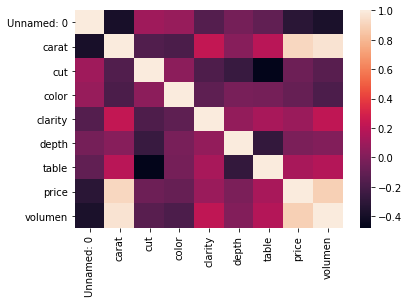

In [22]:
%matplotlib inline
sns.heatmap(corrMat)
plt.show()

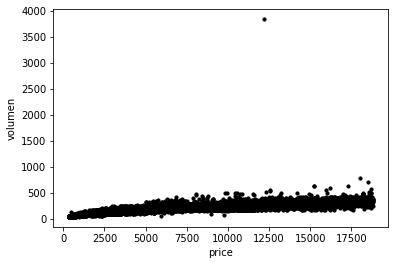

In [23]:
#Fijándose únicamente en la variable precio con respecto a las otras, se puede percibir que las variables
#carar y volumen se encuentran estrechamente a ella, por lo tanto se procede visualizar el comportamiento 
#de cada una con.
diamonds_filtered.plot.scatter(x = 'price', y = 'volumen', s = 10,c = 'black');

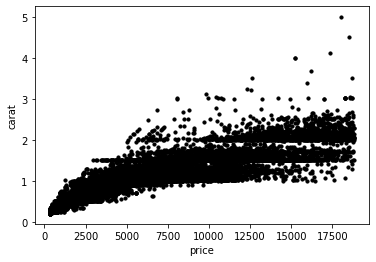

In [24]:
diamonds_filtered.plot.scatter(x = 'price', y = 'carat', s = 10,c = 'black');

In [25]:
diamonds_filtered.loc[diamonds['volumen'].idxmax()]

Unnamed: 0    24063.00000
carat             2.00000
cut               3.00000
color             3.00000
clarity           4.00000
depth            58.90000
table            57.00000
price         12210.00000
volumen        3840.59806
Name: 24063, dtype: float64

In [26]:
#Se elimina el valor atípico para tener un mejor ajuste.
diamonds_filtered = diamonds_filtered.drop(24063)


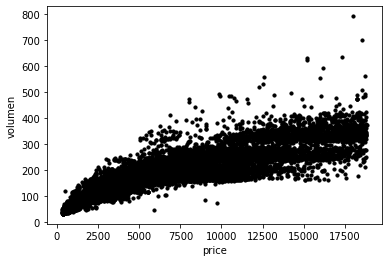

In [27]:
diamonds_filtered.plot.scatter(x = 'price', y = 'volumen', s = 10,c = 'black');

In [28]:
diamonds_filtered.loc[diamonds['table'].idxmax()]

Unnamed: 0    24928.000000
carat             2.010000
cut               0.000000
color             4.000000
clarity           6.000000
depth            58.600000
table            95.000000
price         13387.000000
volumen         336.707904
Name: 24928, dtype: float64

In [29]:
diamonds_filtered.loc[diamonds['depth'].idxmax()]

Unnamed: 0    52850.000000
carat             0.500000
cut               0.000000
color             5.000000
clarity           5.000000
depth            79.000000
table            73.000000
price          2579.000000
volumen         110.380102
Name: 52850, dtype: float64

In [30]:
#Preparación de los datos para el entrenamiento.
#Se procede a separar el data set en dos 
diamonds_filtered.head()#Dataframe listo.
#Exportamos dataframe para ocuparlos luego.
diamonds_filtered.to_csv('diamonds_filtered.csv')
diamonds_stolen.to_csv('diamonds_stolen_ready.csv')

In [31]:
#Seleccion de variable objetivo.
targetData = diamonds_filtered['price']
targetData.head()
trainData = diamonds_filtered[['carat','cut','color','clarity', 'depth','table','volumen']]

In [32]:
#Entrenamiento del modelo
from sklearn.model_selection import train_test_split
#Separamos la base de datos para entrenamiento y prueba.
#x_train y y_train contiene el 80% de trainData.
#x_test y x_test contiene el 20% de trainData.
x_train,x_test,y_train,y_test=train_test_split(trainData,targetData,test_size=0.20,random_state=123)
xtrain_rows = len(x_train.index)
ytrain_rows = len(y_train.index)
xtest_rows = len(x_test.index)
ytest_rows = len(y_test.index)

## Entrenamieto de modelos
SGDRegressor

GBRegressor

In [33]:
#Llamado de paqueterías para el modelo Stochastic Gradient Regressor.
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#Definición del modelo y entrenamiento con los dataframes x_train, y_train, 
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=10000, tol=1e-3))
reg.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [34]:
#Estimación el modelo con datos conocidos.
y_pred_1 = reg.predict(x_test)

In [35]:
#Evaluación del modelo, con la métrica R2 Score, 
#Rango de valores (-inf,1], con 1 el mejor.
r2_1 = reg.score(x_test,y_test)
print("Evaluación del modelo SGDRegressor con datos de prueba, dando luga a R2 = ",r2_1)

Evaluación del modelo SGDRegressor con datos de prueba, dando luga a R2 =  0.8737843027365817


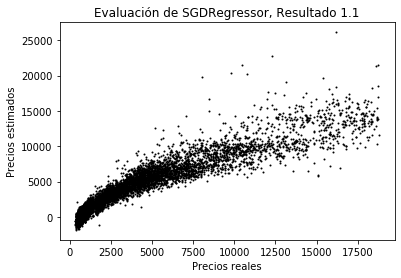

In [36]:
#Graficamos valores objetivo VS valores estimados.
plt.scatter(y_test,y_pred_1,s=1,color='black')
plt.xlabel('Precios reales')
plt.ylabel('Precios estimados')
plt.title("Evaluación de SGDRegressor, Resultado 1.1")
plt.show()

Como se puede notar en la gráfica anterior, los datos se encuentran dispersos, sin embargo se aproximan a un comportamiento lineal esperado, una curva que se puede ajustar a ello es polinomio de grado 2.

In [37]:
#Evaluando con datos reales:
#diamonds_stoles <-- Base de datos de los diamantes robados en el banco de Gringotts
y_pred_Problem = reg.predict(diamonds_stolen)
print("Estimación de los diamantes robados utilizando SGDRegressor:")
print(y_pred_Problem)

Estimación de los diamantes robados utilizando SGDRegressor:
[2795.27216257 5149.50993071 1750.6303882   176.74479894  727.17500816
 4309.28083997 1831.40097189 7775.1074252  1840.33294765 -445.73482631]


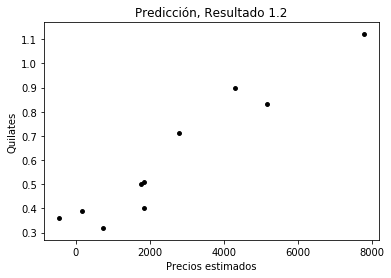

In [38]:
#Gráficas entre variables con datos no conocidos.
#Estimación del problema.
plt.scatter(y_pred_Problem,diamonds_stolen['carat'],s=15,color='black')
plt.xlabel('Precios estimados')
plt.ylabel('Quilates')
plt.title("Predicción, Resultado 1.2")
plt.show()

La gráfica anterior muestra la relación entre el valor estimado del problema y la variable *carat* (quilate), también se muestra la correlación entre la variable precio y quilate (a mayor precio, más quilates), sin embargo de acuerdo a la métrica de error obtenida que se encuentra debajo del 0.90 y los valores negativos de precios estimados, no da la certeza de ser un modelo completamente funcional.

In [39]:
#Entrenamiento del modelo con el algoritmo del GBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
#Creación del modelo.
reg = GradientBoostingRegressor(random_state=0)

In [41]:
#Entrenamiento del modelo.
reg.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
#Estimación el modelo con datos conocidos.
y_pred_2 = reg.predict(x_test)

In [43]:
r2_2 = reg.score(x_test,y_test)
print("Evaluación del modelo GradientBoostingRegressor con datos de prueba, con métrica R2 = ",r2_2)

Evaluación del modelo GradientBoostingRegressor con datos de prueba, con métrica R2 =  0.9653115352859628


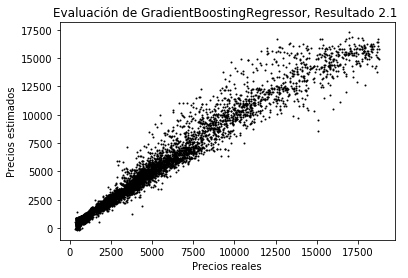

In [44]:
#Graficamos valores objetivo VS valores estimados.
plt.scatter(y_test,y_pred_2,s=1,color='black')
plt.xlabel('Precios reales')
plt.ylabel('Precios estimados')
plt.title("Evaluación de GradientBoostingRegressor, Resultado 2.1 ")
plt.show()

En la gráfica anterior se puede muestra un comportamiento completamente lineal, ya que la curva que mejor se ajusta a la gráfica es una línea recta x=y, por lo tanto la diferencia entre el valor estimado y el real no es significativa.

In [45]:
y_pred_Problem2 = reg.predict(diamonds_stolen)
print("Estimación de los diamantes robados utilizando Gradient Boosting Regressor:")
print(y_pred_Problem2)

Estimación de los diamantes robados utilizando Gradient Boosting Regressor:
[2433.25977498 3779.39960209 1678.57517197  507.9068686   845.08566782
 3245.93600837 2020.23317051 9650.58895784 1149.24967601  670.32575539]


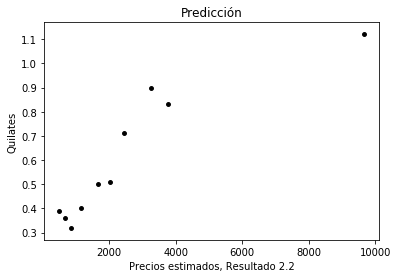

In [46]:
#Gráficas entre variables con datos no conocidos.
#Estimación del problema.
plt.scatter(y_pred_Problem2,diamonds_stolen['carat'],s=15,color='black')
plt.xlabel('Precios estimados, Resultado 2.2')
plt.ylabel('Quilates')
plt.title("Predicción")
plt.show()

El comportamiento de la gráfica anterior se asemeja demasiado a la forma de graficas los precios reales vs los quilates. La métrica de error R2 obtenida es mayor a 0.95 y no se tienen precios no válidos, por lo tanto este resulta ser un modelo completamente funcional.